# Week 4 handin

#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

# STATUS

#### Ex 1 Classes - 1-5 done
Can't figure out how to do 6 and 7

In [17]:
import numpy as np
filename = './data/befkbhalderstatkode.csv'

#1 - 2
bef_stats_df = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
dd = bef_stats_df

#3
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = dd[mask & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

mask = (dd[:,0] == 2015)

peopleInNeighb = np.array([number_of_people_per_neighbourhood(n, mask) for n in neighb.keys()])

print(peopleInNeighb)

[51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]


<IPython.core.display.Javascript object>


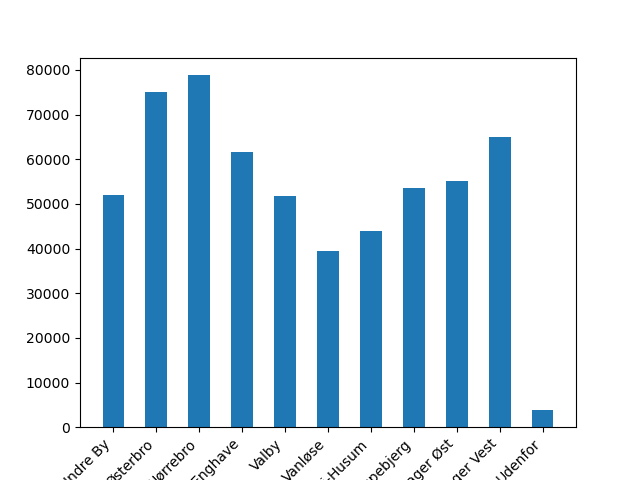

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt

#4
plt.bar(neighb.values(),peopleInNeighb,width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

In [42]:
#5
mask = (dd[:,0] == 2015) & (dd[:,2] > 65) & (dd[:,1] <= 10)
print(mask)
mask2 = (dd[:,3] == 5010) | (dd[:,3] == 5020)
sum = np.sum(mask)

print(sum)

[False False False ... False False False]
2612


In [43]:
#6
mask2 = dd[mask & (dd[:,3] == 5110) | (dd[:,3] == 5120)]
print(mask2)
sum = np.sum(mask2)
print(sum)

[[2015    1    0 5120    4]
 [2015    1    1 5120    4]
 [2015    1    2 5120    3]
 ...
 [1992   99   53 5120    1]
 [1992   99   54 5120    1]
 [1992   99   55 5120    1]]
120447794
